# I will try to describe step by step everything done here

### 1. Download some packages 
### 2. and data:

For the data to be able to be download you need the "data_normalized.csv" file to be in the same folder as these notebooks are. There are two options, either you run the "normalizing_df.py" and then copy from the bld folder the file or you just tell me to send it to you (I will probably send it already).

In [1]:
import numpy as np
from sklearn import tree
import pandas as pd
from econml.dml import CausalForestDML as CausalForest
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
from econml.cate_interpreter import SingleTreeCateInterpreter
from econml.dml import LinearDML
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

data_1 = pd.read_csv(
    "data_normalized.csv"
)
data_1

/Users/brendatorres/miniforge3/envs/ml_project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Columns (18,27,696) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0.1,Unnamed: 0,login,sufficiency_1,sufficiency_2,sufficiency_3,sufficiency_4,sufficiency_5,A,X2,...,pandemic_risk_wi,rest_wi,migration_wi,energy_saving_ll,sustainable_food_ll,second_hand_ll,three_tax,PC1,open_to_experience,three_ban
0,0,0.000000,0.000000,1.00,0.25,0.00,1.00,0.75,0.919255,0.909758,...,0.5,0.833333,0.5,0.6,0.50,0.0,0.500000,0.40625,0.590909,0.333333
1,1,0.001553,0.001954,1.00,0.25,0.50,1.00,0.75,0.749224,0.741746,...,0.5,0.500000,0.8,0.4,0.75,0.0,0.000000,0.25000,0.636364,0.000000
2,2,0.003106,0.003322,0.25,0.25,0.50,0.50,0.00,0.680124,0.674248,...,0.5,0.777778,0.2,0.6,0.50,0.0,0.666667,0.56250,0.772727,0.000000
3,3,0.003882,0.003712,0.25,0.25,0.50,0.25,0.50,0.885093,0.876009,...,0.5,0.444444,0.3,0.6,0.25,0.0,0.333333,0.59375,0.545455,0.000000
4,4,0.004658,0.004103,0.50,1.00,0.50,0.25,0.75,0.162267,0.159208,...,0.1,0.694444,0.6,0.6,0.25,1.0,0.333333,0.46875,0.454545,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,813,0.995342,0.996092,1.00,0.25,1.00,1.00,0.75,0.833851,0.824652,...,0.1,0.472222,0.1,0.6,0.50,0.0,0.333333,0.31250,0.727273,0.000000
814,814,0.996118,0.996288,1.00,0.25,0.00,1.00,0.00,0.148292,0.146001,...,0.1,0.944444,0.7,1.0,0.50,0.0,0.500000,0.40625,0.681818,0.333333
815,815,0.997671,0.996874,0.25,0.25,1.00,1.00,0.75,0.827640,0.818782,...,0.2,0.750000,0.7,0.6,0.50,0.0,0.666667,0.68750,0.681818,0.666667
816,816,0.999224,0.998632,1.00,1.00,0.50,0.25,0.75,0.676242,0.669112,...,0.9,0.861111,0.9,0.4,0.00,1.0,0.333333,0.62500,0.500000,0.000000


### 3. Defining our important variables

Here feel free to add any variables wanted: "country_residence", "age", "female_created", "education", "financialwellbeing", "urban", "houseowner", "housepeople_14", "housepeople_2", "housepeople_3", "housepeople_4", "housepeople_5", "housepeople_6",
"worldissues_6", "worldissues_1", "worldissues_2", "worldissues_3", "worldissues_4", "worldissues_5", "worldissues_7", "worldissues_8","migration_importance", "world_issues","policy_preferences", "confidence", "bonusdonation_w1", "trust_in_science", "trust_in_institutions", "trustclimatechange1", "persconcern", "perspriority_3", "masculinity_40_inv", "masculinity_41_inv", "persistency","masculinity_47", "CW_var", "influence_society", "influencegeneral_4", "influencegeneral_3", "openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism", "Positive_Reciprocity", "Negative_Reciprocity", "Altruism", "Trust", "Risk_Preferences", "Time_Preferences", "ProcrastinationExPost", "ProcrastinationExAnte", "rationality_score", "Social_Anxiety", "Public_SelfConsciousness", "Private_SelfConsciousness", "empathic_concern_score", "growthmind", "opinion_migration" **AND MANY OTHERS**

Also, you can make another list, just make sure the name of your list is where I marked

In [2]:
y_1 = data_1["Q1_1"]
z_1 = data_1["Q1_1_treat"].astype(int)

y_2 = data_1["Q1_2"]
z_2 = data_1["Q1_2_treat"].astype(int)

y_3 = data_1["Q2_1"]
z_3 = data_1["Q2_1_treat"].astype(int)

y_4 = data_1["Q2_2"]
z_4 = data_1["Q2_2_treat"].astype(int)

list_we_like = ["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism",
                "rationality_score", "growthmind", "Trust", "Altruism", "Risk_Preferences",
                "marielboatlift_1", "empathic_concern_score"
                ]

talk_list_1 = ["open_to_experience", "PC1", "empathic_concern_score", "Altruism", 
               "Positive_Reciprocity", "Negative_Reciprocity", "Trust", "Risk_Preferences",
               "rationality_score", "optimism_bias", "three_tax", "three_ban",
               "education", "age", "financialwellbeing", "born_in_lux"]

talk_list_2 = ["open_to_experience", "PC1", "empathic_concern_score", "Altruism", 
               "Negative_Reciprocity", "Trust", "Risk_Preferences",
               "rationality_score", "optimism_bias", "three_tax",
               "education", "age", "financialwellbeing", "born_in_lux"]

# perspective_taking_score knowledge_mariel

x_cov = data_1[talk_list_1] # HERE data_1[NAME OF MY LIST]

### 4. We choose the model for calculating the propensity of being treated and the one calculating the outcome. This could also be filled by 'auto'

To be honest, which models to choose here is a very theoretical decision. As far as I understand is related to how you think these variables are related to each other (linear, non-linear, etc). I chose non-linear, but I do not have a strong econometric backround that backsup this decision.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor

from econml.metalearners import TLearner
from econml.dml import DML

from econml.validate.drtester import DRTester


# Yo esto de por que escogen gradient o lo otro no lo entiendo... intentar entender

model_regression = RandomForestRegressor(random_state=23)
model_propensity = RandomForestClassifier(random_state=23)

### 5. We calculate the Causal Forest per outcome

The parameters can later be chosen by the best ones in another test.

In [4]:
model_1_0 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_1, z_1, X=x_cov)

model_2_0 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_2, z_2, X=x_cov)

model_3_0 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_3, z_3, X=x_cov)

model_4_0 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_4, z_4, X=x_cov)


### 6. We graph the individual effect estimated

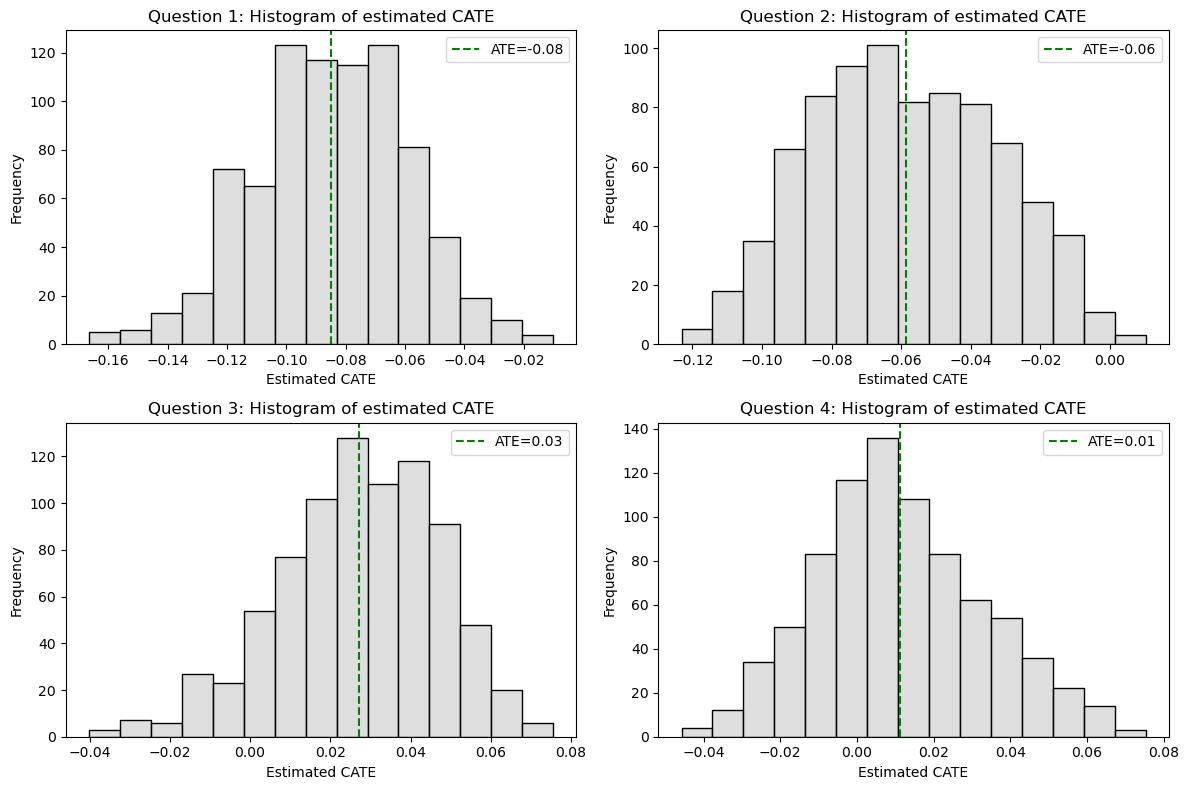

In [5]:
ate_1 = model_1_0.ate(x_cov)
ate_2 = model_2_0.ate(x_cov)
ate_3 = model_3_0.ate(x_cov)
ate_4 = model_4_0.ate(x_cov)

cate_1 = model_1_0.effect(x_cov)
cate_2 = model_2_0.effect(x_cov)
cate_3 = model_3_0.effect(x_cov)
cate_4 = model_4_0.effect(x_cov)

ate_list = [ate_1, ate_2, ate_3, ate_4]
cate_list = [cate_1, cate_2, cate_3, cate_4]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
  sns.histplot(cate_list[i], bins=15, color='lightgray', edgecolor='black', ax=axes[i])
  axes[i].set_title(f'Question {i+1}: Histogram of estimated CATE')
  axes[i].set_xlabel("Estimated CATE")
  axes[i].set_ylabel("Frequency")
  axes[i].axvline(ate_list[i], color="green", linestyle="--", label=f'ATE={ate_list[i]:.2f}')
  axes[i].legend()

plt.tight_layout()
plt.show()

### 7. Now we split the data so we can check how good our predictions are in a sample oob

Here we selected 0.4 for testing BUT feel free to change it and check the results

In [6]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, z_train_1, z_test_1, y_train_1, y_test_1 = train_test_split(x_cov, z_1, y_1, test_size=0.4, stratify=y_1, random_state= 2000)
x_train_2, x_test_2, z_train_2, z_test_2, y_train_2, y_test_2 = train_test_split(x_cov, z_2, y_2, test_size=0.4, stratify=y_2, random_state= 2000)
x_train_3, x_test_3, z_train_3, z_test_3, y_train_3, y_test_3 = train_test_split(x_cov, z_3, y_3, test_size=0.4, stratify=y_3, random_state= 2000)
x_train_4, x_test_4, z_train_4, z_test_4, y_train_4, y_test_4 = train_test_split(x_cov, z_4, y_4, test_size=0.4, stratify=y_4, random_state= 2000)


### 8. We run again the forests BUT only with the train data

In [7]:
model_1 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_train_1, z_train_1, X=x_train_1)
print(model_1.summary())

model_2 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_train_2, z_train_2, X=x_train_2)
print(model_2.summary())

model_3 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_train_3, z_train_3, X=x_train_3)
print(model_3.summary())

model_4 = CausalForest(
    model_y=RandomForestRegressor(random_state=23),
    model_t=RandomForestClassifier(random_state=23),
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_train_4, z_train_4, X=x_train_4)
print(model_4.summary())

Population summary results are available only if `cache_values=True` at fit time!
        Doubly Robust ATE on Training Data Results       
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATE         -0.076  0.028 -2.735  0.006   -0.131   -0.022
     Doubly Robust ATT(T=0) on Training Data Results     
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATT         -0.088  0.039 -2.252  0.024   -0.165   -0.011
     Doubly Robust ATT(T=1) on Training Data Results     
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATT         -0.063   0.04 -1.591  0.112   -0.141    0.015
---------------------------------------------------------
Population summary results are available only if `cache_values=True` at fit time!
       Doubly Robust ATE on Training Data Results       
    point_estimate stderr

Here is just something technical needed for the DRTest to work

In [8]:
x_train_1_t = x_train_1.to_numpy()
x_test_1_t = x_test_1.to_numpy()
z_train_1_t = z_train_1.to_numpy()
z_test_1_t = z_test_1.to_numpy()
y_train_1_t = y_train_1.to_numpy()
y_test_1_t = y_test_1.to_numpy()

x_train_1_t = np.round(x_train_1_t, 2)
x_test_1_t = np.round(x_test_1_t, 2)
z_train_1_t = np.round(z_train_1_t, 2)
z_test_1_t = np.round(z_test_1_t, 2)
y_train_1_t = np.round(y_train_1_t, 2)
y_test_1_t = np.round(y_test_1_t, 2)

x_train_2_t = x_train_2.to_numpy()
x_test_2_t = x_test_2.to_numpy()
z_train_2_t = z_train_2.to_numpy()
z_test_2_t = z_test_2.to_numpy()
y_train_2_t = y_train_2.to_numpy()
y_test_2_t = y_test_2.to_numpy()

x_train_2_t = np.round(x_train_2_t, 2)
x_test_2_t = np.round(x_test_2_t, 2)
z_train_2_t = np.round(z_train_2_t, 2)
z_test_2_t = np.round(z_test_2_t, 2)
y_train_2_t = np.round(y_train_2_t, 2)
y_test_2_t = np.round(y_test_2_t, 2)

x_train_3_t = x_train_3.to_numpy()
x_test_3_t = x_test_3.to_numpy()
z_train_3_t = z_train_3.to_numpy()
z_test_3_t = z_test_3.to_numpy()
y_train_3_t = y_train_3.to_numpy()
y_test_3_t = y_test_3.to_numpy()

x_train_3_t = np.round(x_train_3_t, 2)
x_test_3_t = np.round(x_test_3_t, 2)
z_train_3_t = np.round(z_train_3_t, 2)
z_test_3_t = np.round(z_test_3_t, 2)
y_train_3_t = np.round(y_train_3_t, 2)
y_test_3_t = np.round(y_test_3_t, 2)

x_train_4_t = x_train_4.to_numpy()
x_test_4_t = x_test_4.to_numpy()
z_train_4_t = z_train_4.to_numpy()
z_test_4_t = z_test_4.to_numpy()
y_train_4_t = y_train_4.to_numpy()
y_test_4_t = y_test_4.to_numpy()

x_train_4_t = np.round(x_train_4_t, 2)
x_test_4_t = np.round(x_test_4_t, 2)
z_train_4_t = np.round(z_train_4_t, 2)
z_test_4_t = np.round(z_test_4_t, 2)
y_train_4_t = np.round(y_train_4_t, 2)
y_test_4_t = np.round(y_test_4_t, 2)

### 9. We do the DRTest

We first only see the summary and later we plot some graphs.

Here feel free to change de n_groups (division) to the number wished, 4, 3 or leave it in 2

### QUESTION 1

In [9]:
cf_tester = DRTester(
    model_regression=model_regression,
    model_propensity=model_propensity,
    cate=model_1
).fit_nuisance(x_test_1_t, z_test_1_t, y_test_1_t, x_train_1_t, z_train_1_t, y_train_1_t)

res_cf = cf_tester.evaluate_all(x_test_1_t, x_train_1_t, n_groups=2)
res_cf.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,0.949,1.899,0.618,0.004,0.008,0.329,0.003,0.026,0.458,-0.778


<Axes: title={'center': 'Treatment = 1, Integral = 0.003 +/- 0.026'}, xlabel='Percentage treated', ylabel='Gain over Random'>

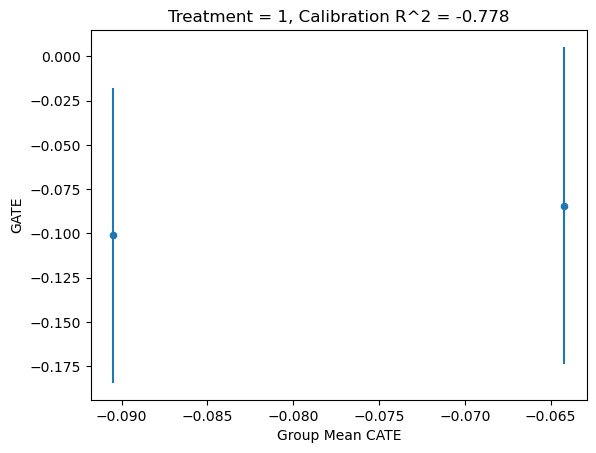

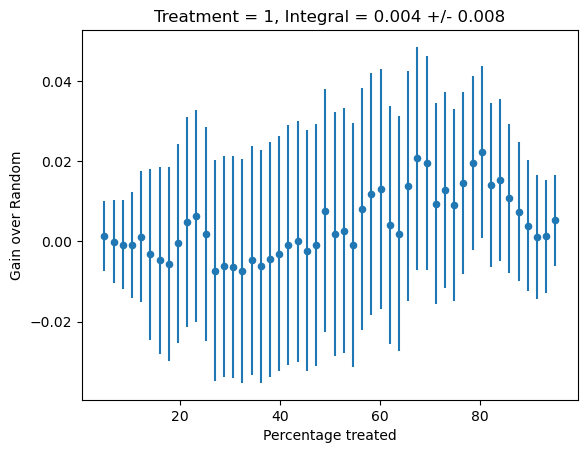

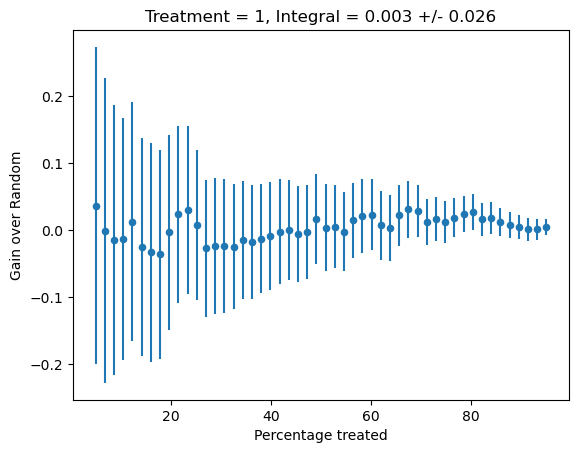

In [10]:
res_cf.plot_cal(1)
res_cf.plot_qini(1)
res_cf.plot_toc(1)

### QUESTION 2

In [11]:
cf_tester = DRTester(
    model_regression=model_regression,
    model_propensity=model_propensity,
    cate=model_2
).fit_nuisance(x_test_2_t, z_test_2_t, y_test_2_t, x_train_2_t, z_train_2_t, y_train_2_t)

res_cf = cf_tester.evaluate_all(x_test_2_t, x_train_2_t, n_groups=2)
res_cf.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,-0.033,1.055,0.975,0.001,0.008,0.436,0.014,0.026,0.29,-1.375


<Axes: title={'center': 'Treatment = 1, Integral = 0.014 +/- 0.026'}, xlabel='Percentage treated', ylabel='Gain over Random'>

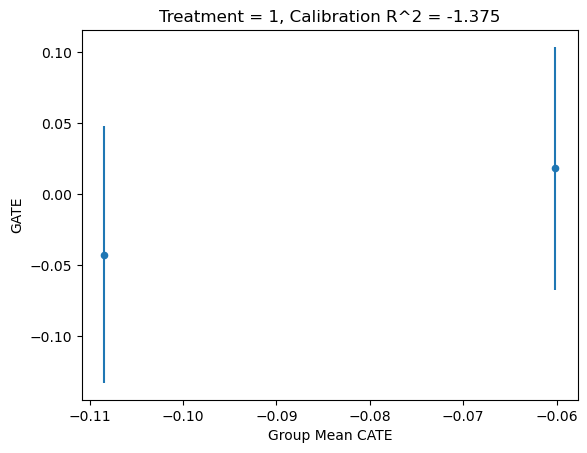

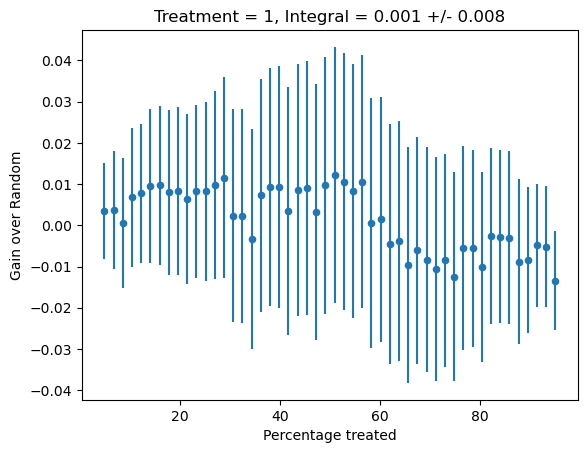

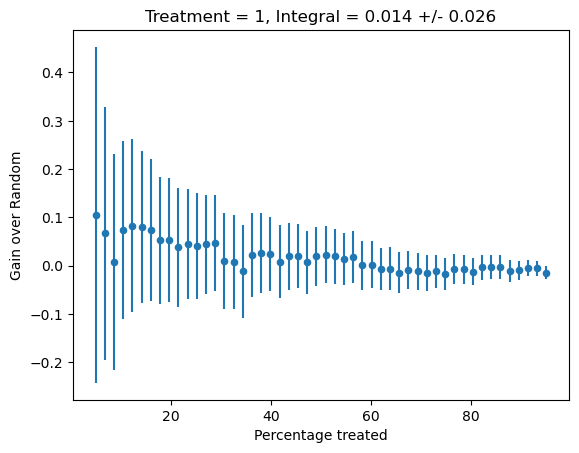

In [12]:
res_cf.plot_cal(1)
res_cf.plot_qini(1)
res_cf.plot_toc(1)

### QUESTION 3

In [13]:
cf_tester = DRTester(
    model_regression=model_regression,
    model_propensity=model_propensity,
    cate=model_3
).fit_nuisance(x_test_3_t, z_test_3_t, y_test_3_t, x_train_3_t, z_train_3_t, y_train_3_t)

res_cf = cf_tester.evaluate_all(x_test_3_t, x_train_3_t, n_groups=2)
res_cf.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,-2.109,1.539,0.171,-0.011,0.008,0.082,-0.022,0.021,0.154,-0.296


<Axes: title={'center': 'Treatment = 1, Integral = -0.022 +/- 0.021'}, xlabel='Percentage treated', ylabel='Gain over Random'>

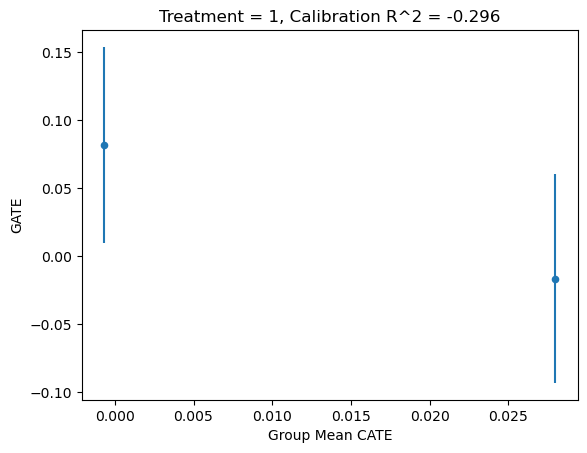

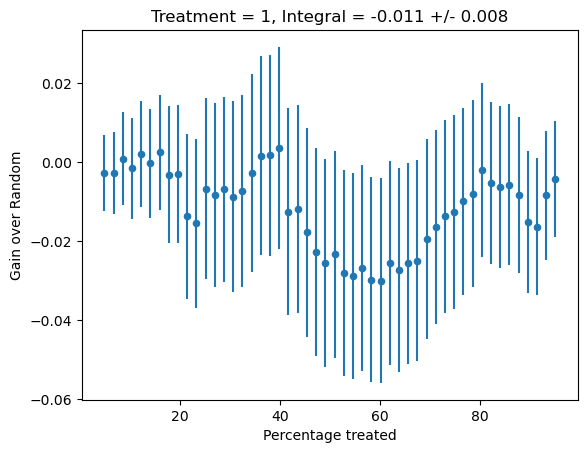

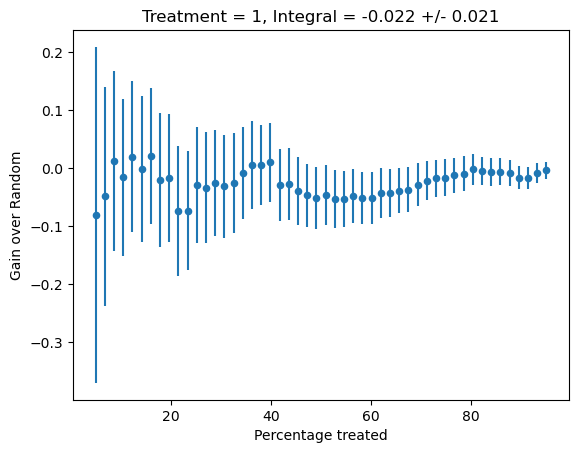

In [14]:
res_cf.plot_cal(1)
res_cf.plot_qini(1)
res_cf.plot_toc(1)

### QUESTION 4

In [15]:
cf_tester = DRTester(
    model_regression=model_regression,
    model_propensity=model_propensity,
    cate=model_4
).fit_nuisance(x_test_4_t, z_test_4_t, y_test_4_t, x_train_4_t, z_train_4_t, y_train_4_t)

res_cf = cf_tester.evaluate_all(x_test_4_t, x_train_4_t, n_groups=2)
res_cf.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,1.114,1.464,0.447,0.006,0.007,0.184,0.016,0.023,0.246,-4.7


<Axes: title={'center': 'Treatment = 1, Integral = 0.016 +/- 0.023'}, xlabel='Percentage treated', ylabel='Gain over Random'>

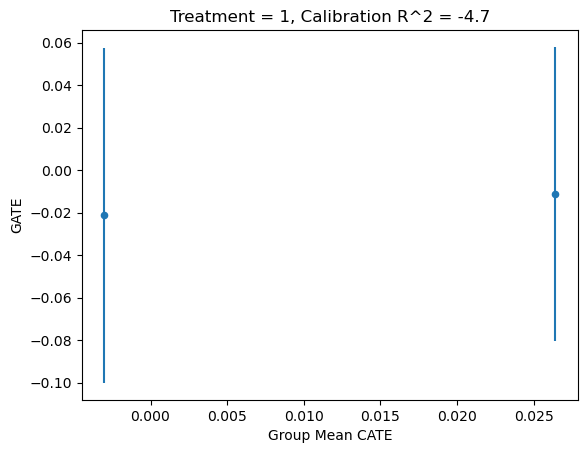

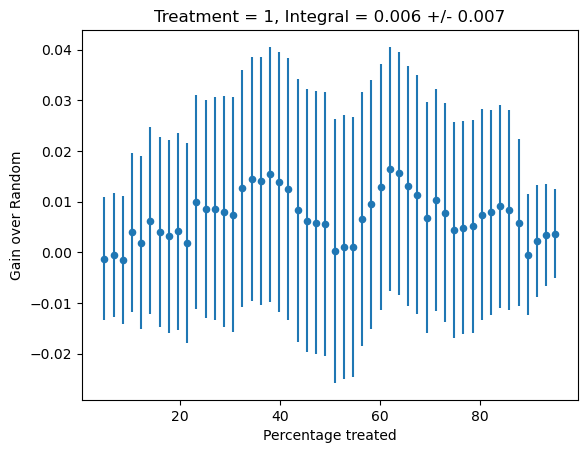

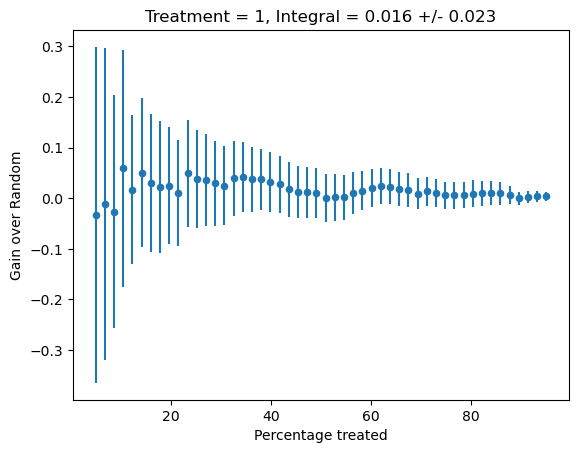

In [16]:
res_cf.plot_cal(1)
res_cf.plot_qini(1)
res_cf.plot_toc(1)

### 9. We check the variable importances

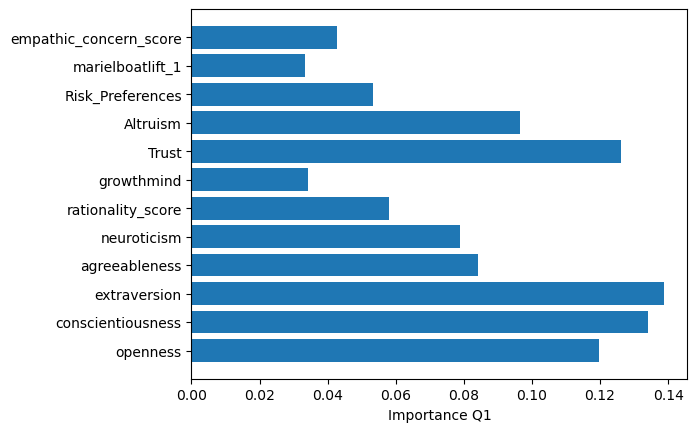

In [52]:
importances_1 = model_1.feature_importances_
features_1 = x_cov.columns
plt.barh(features_1, importances_1)
plt.xlabel("Importance Q1")
plt.show()

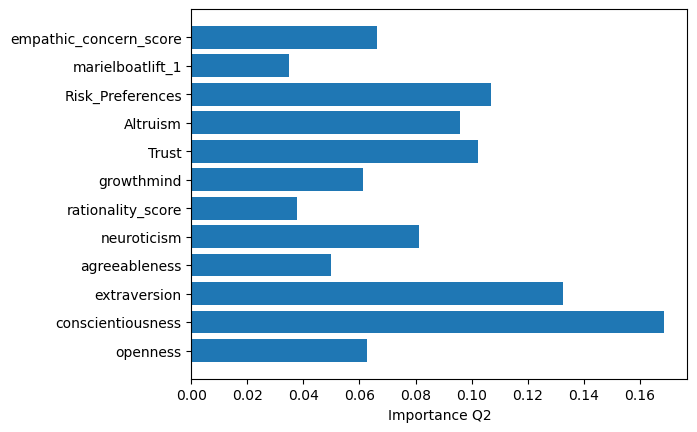

In [53]:
importances_2 = model_2.feature_importances_
features_2 = x_cov.columns
plt.barh(features_2, importances_2)
plt.xlabel("Importance Q2")
plt.show()

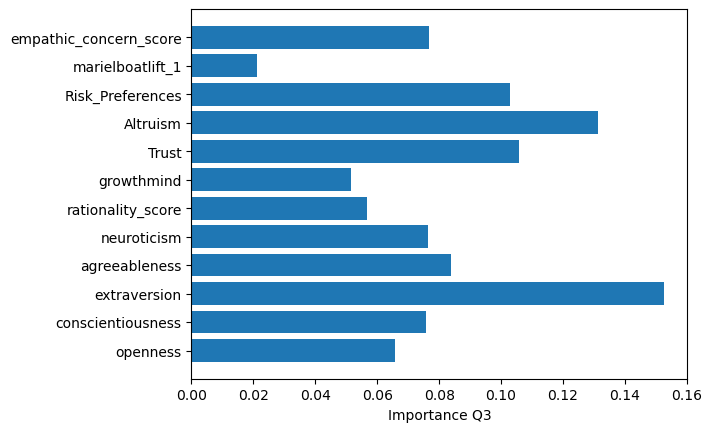

In [54]:
importances_3 = model_3.feature_importances_
features_3 = x_cov.columns
plt.barh(features_3, importances_3)
plt.xlabel("Importance Q3")
plt.show()

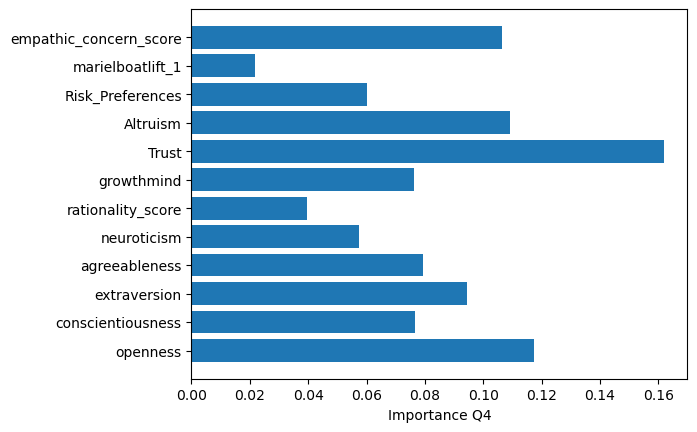

In [55]:
importances_4 = model_4.feature_importances_
features_4 = x_cov.columns
plt.barh(features_4, importances_4)
plt.xlabel("Importance Q4")
plt.show()

### 10. And we can also check a tree interpreter

Here it is important to change where I marked the list of the name

Feel free to change max depth of the tree and other parameters

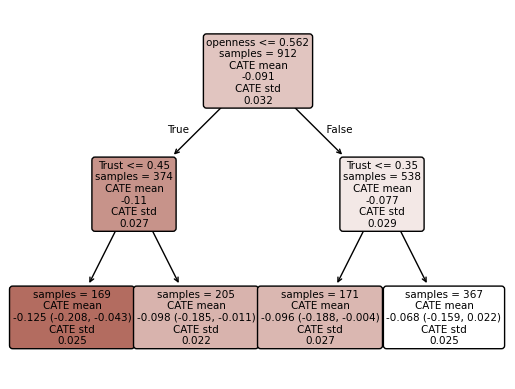

In [56]:
intrp_1 = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10, random_state=23)
intrp_1.interpret(model_1, x_cov)
intrp_1.plot(feature_names=list_we_like) # HERE feature_names = YOUR LIST NAME

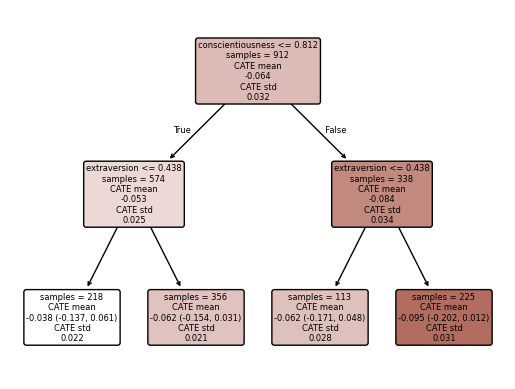

In [57]:
intrp_2 = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10, random_state=23)
intrp_2.interpret(model_2, x_cov)
intrp_2.plot(feature_names=list_we_like) # HERE feature_names = YOUR LIST NAME

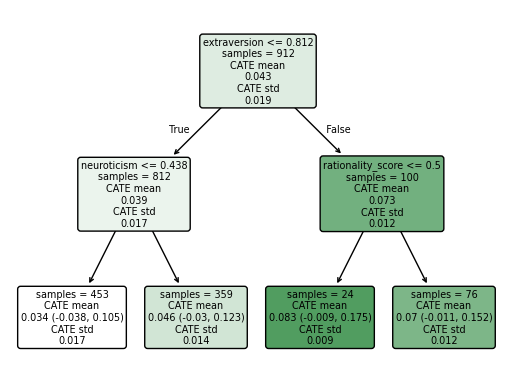

In [58]:
intrp_3 = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10, random_state=23)
intrp_3.interpret(model_3, x_cov)
intrp_3.plot(feature_names=list_we_like) # HERE feature_names = YOUR LIST NAME

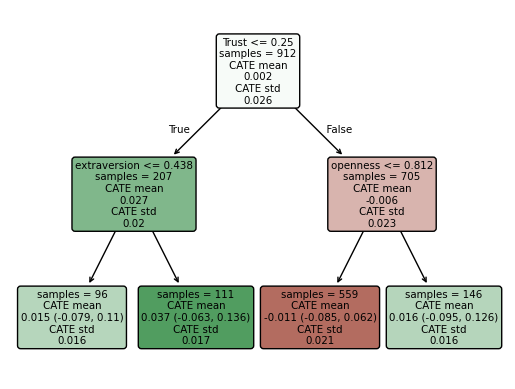

In [59]:
intrp_4 = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10, random_state=23)
intrp_4.interpret(model_4, x_cov)
intrp_4.plot(feature_names=list_we_like) # HERE feature_names = YOUR LIST NAME

### This is extra because I wanted to see it does not change with auto much

In [35]:
model_1_0_test = CausalForest(
    model_y='auto',
    model_t='auto',
    n_estimators=100,
    discrete_treatment=True,
    criterion="het",
    min_samples_leaf=10,
    max_samples=0.5,
    random_state=23
).fit(y_train_1, z_train_1, X=x_train_1)

In [36]:
cf_tester = DRTester(
    model_regression=model_regression,
    model_propensity=model_propensity,
    cate=model_1
).fit_nuisance(x_test_1_t, z_test_1_t, y_test_1_t, x_train_1_t, z_train_1_t, y_train_1_t)

res_cf = cf_tester.evaluate_all(x_test_1_t, x_train_1_t, n_groups=2)
res_cf.summary()

,treatment,blp_est,blp_se,blp_pval,qini_est,qini_se,qini_pval,autoc_est,autoc_se,autoc_pval,cal_r_squared
0,1,-0.155,1.094,0.888,-0.003,0.008,0.34,-0.01,0.023,0.336,-0.622


<Axes: title={'center': 'Treatment = 1, Integral = -0.01 +/- 0.023'}, xlabel='Percentage treated', ylabel='Gain over Random'>

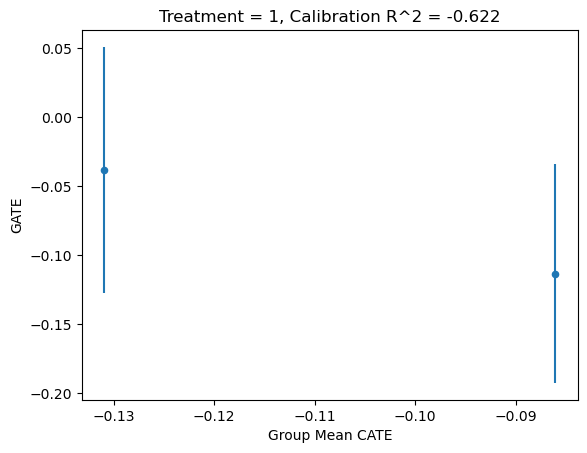

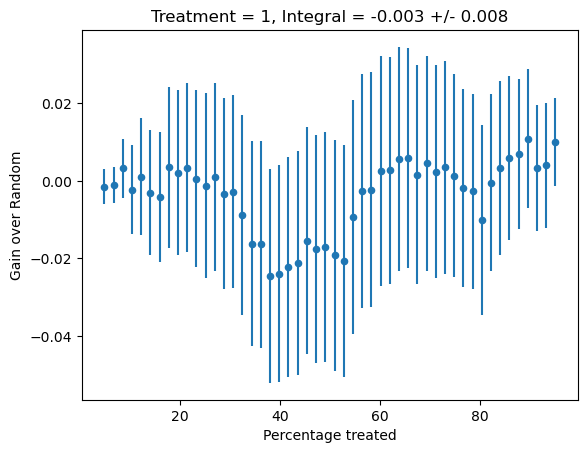

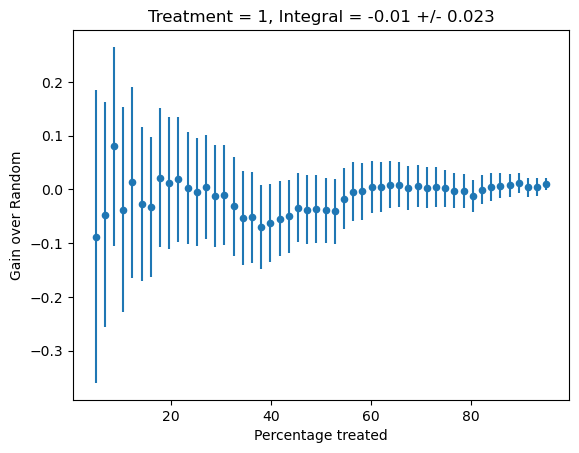

In [37]:
res_cf.plot_cal(1)
res_cf.plot_qini(1)
res_cf.plot_toc(1)